## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [9]:
# Print mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
# Print Study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how='left')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
# Number of Duplicate mice by Mouse ID
duplicate_mouse_id = mouse_study['Mouse ID'].count()
# Number of Unique mice by Mouse ID
unique_mouse_id = mouse_study['Mouse ID'].nunique()
# Print results
print("Duplicate Mouse:",duplicate_mouse_id)
print("Unique Mouse:",unique_mouse_id)

Duplicate Mouse: 1893
Unique Mouse: 249


In [13]:
#Number of mice table
number_of_mice_table = pd.DataFrame({"Duplicate Mice":[duplicate_mouse_id],
                                   "Unique Mice":[unique_mouse_id]})
#Print mice table
number_of_mice_table

,Duplicate Mice,Unique Mice
0,1893,249


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id_timepoint_df = mouse_study[['Mouse ID','Timepoint']]
# Print
duplicate_mouse_id_timepoint_df.head(5)

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_table = mouse_study.drop_duplicates(subset = ["Mouse ID"])
# Print to check
unique_mice_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [16]:
# Checking the number of mice in the clean DataFrame.
unique_mice_table['Mouse ID'].count()

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = mouse_study.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = mouse_study.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor = mouse_study.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor = mouse_study.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = mouse_study.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean of Tumor":mean_tumor,
                          "Median of Tumor":median_tumor,
                          "Variance of Tumor":variance_tumor,
                          "Standard Deviation of Tumor":stddev_tumor,
                          "SEM of Tumor":sem_tumor})

# Make it neater with rounding decimals
summary_df = summary_df.round(2)
# Print table
summary_df.head()

,Mean of Tumor,Median of Tumor,Variance of Tumor,Standard Deviation of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_single_stats = pd.DataFrame(pd.value_counts(mouse_study["Drug Regimen"]))
# Print to check
regimen_single_stats

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar and Pie Charts

<AxesSubplot:>

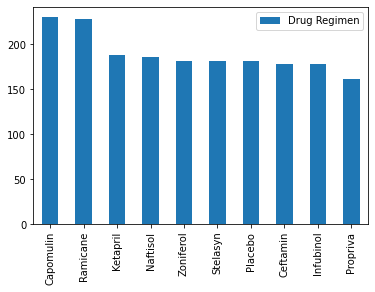

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_single_stats.plot(kind="bar")

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Prepare the data by grouping and data by the drug regimen

mouse_study_drug_grouped = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
#print to check
mouse_study_drug_grouped.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Time points')

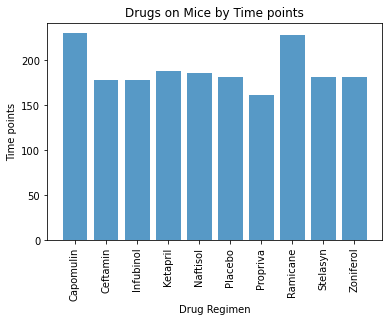

In [119]:
# drug number stats from above in an array
drug_stats = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

# set x axis
x_axis = np.arange(len(mouse_study_drug_grouped))

# Generate the bar chart
plt.bar(x_axis, drug_stats, alpha=0.75, align='center')

# set the ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], rotation='vertical')

# put the labels in to the chart
plt.title("Drugs on Mice by Time points")
plt.xlabel("Drug Regimen")
plt.ylabel("Time points")

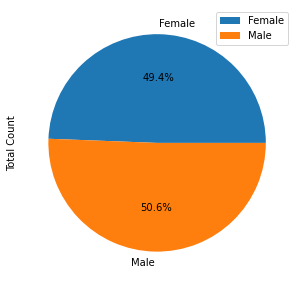

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the mouse study data by drug regimen and sex
sex_distrubtion = mouse_study.groupby(["Sex"])

# get an int from the data using size
mouse_sex_distribution = pd.DataFrame(sex_distrubtion.size())

# index the total as a column
mouse_sex_distribution.columns = ["Total Count"]

# work out percentage between sex
mouse_sex_distribution["Percentage between Sex"] = (100*(mouse_sex_distribution["Total Count"]/mouse_sex_distribution["Total Count"].sum()))

# put in the % into the pie chart
mouse_sex_distribution["Percentage between Sex"] = mouse_sex_distribution["Percentage between Sex"]

# pie chart time
plot = mouse_sex_distribution.plot.pie(y="Total Count",figsize=(5,5),autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x168eee94eb0>,
 [Text(-0.02073322272803588, 1.099804588768073, 'Male'),
  Text(0.020733222728035745, -1.099804588768073, 'Female')],
 [Text(-0.011309030578928661, 0.5998934120553124, '50.6%'),
  Text(0.011309030578928589, -0.5998934120553124, '49.4%')])

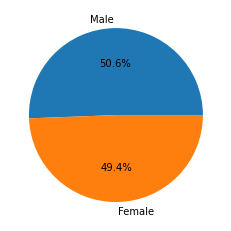

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create labels for sexes
labels = ["Male","Female"]

# Values for pie chart
sizes = [50.6,49.4]

# more pie by pieplot
plt.pie(sizes, labels=labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = mouse_study[mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
# Sort by the timepoint to get greatest
four_treatments = four_treatments.sort_values(["Timepoint"], ascending=True)

# Print to check
four_treatments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [163]:
# Reduce the print above to show what's relevant for plotting
four_treatment_relevant = four_treatments[["Drug Regimen", "Mouse ID","Timepoint","Tumor Volume (mm3)"]]

#print to check
four_treatment_relevant.head(5)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


In [176]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treatments_sort = four_treatments.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
four_treatments_sort.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# covert the series to a dataframe
four_treats_sort_list = four_treatments_sort.to_frame()

# Print to check
four_treats_sort_list

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

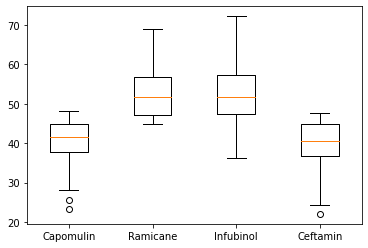

In [192]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# need help to double check this is right it looks wrong
plot_box_step = four_treats_sort_list.reset_index()

tumor_list = vol_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_applied = pd.DataFrame(tumor_list)
volume = [vol for vol in tumor_list_applied['Tumor Volume (mm3)']]
plt.boxplot(volume,labels=treatments)
plt.show()

## Line and Scatter Plots

In [195]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Use mouse b128
volume_time = mouse_study[mouse_study["Mouse ID"].isin(['b128'])]

# print to check
volume_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [201]:
# create dataframe for the data to plot
volume_time_data = volume_time[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
# print to check
volume_time_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
300,b128,0,45.000000
301,b128,5,45.651331
302,b128,10,43.270852
303,b128,15,43.784893
304,b128,20,42.731552
305,b128,25,43.262145
306,b128,30,40.605335
307,b128,35,37.967644
308,b128,40,38.379726
309,b128,45,38.982878


<AxesSubplot:>

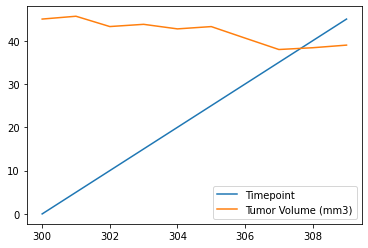

In [202]:
volume_time_data.plot.line()

In [205]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
volume_weight = mouse_study[mouse_study["Drug Regimen"].isin(['Capomulin'])]

# Print to check
volume_weight

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [209]:
# Trim the data so it only shows what we need to use for the scatter plot
volume_weight_plot = mouse_study[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
#print to check
volume_weight_plot

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,k403,16,45.000000
1,k403,16,38.825898
2,k403,16,35.014271
3,k403,16,34.223992
4,k403,16,32.997729
...,...,...,...
1888,z969,30,63.145652
1889,z969,30,65.841013
1890,z969,30,69.176246
1891,z969,30,70.314904


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

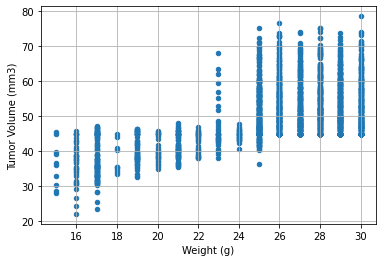

In [211]:
volume_weight_plot.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', grid=True)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
